# Coding Applications in Medicine: Data Science - Numerical Hypothesis Tests

There are two basic hypothesis test to compare numerical variables, t-test and ANOVA. Recall that means are commonly used to compare numerical variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
# Load the insurance data.
insuranceDF = pd.read_csv("data/insurance.csv")
insuranceDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## T-Test

The t-test is used to check for differences in population mean between two groups. 

In the following example, we will examine the differences in medical insurance charges based on whether an individual is a smoker or nonsmoker.

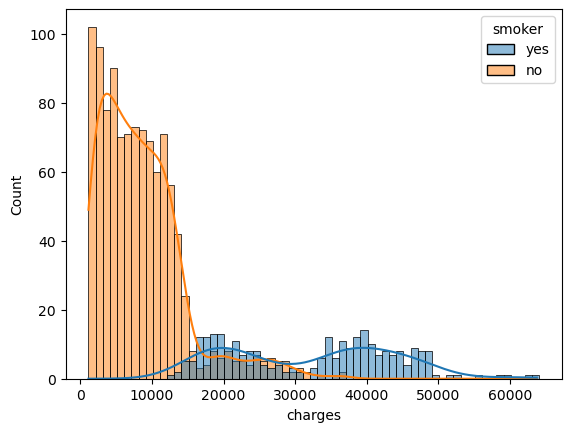

In [3]:
# Graph of the data.
sns.histplot(data=insuranceDF, x="charges", hue="smoker", binwidth=1000, kde=True)
plt.show();

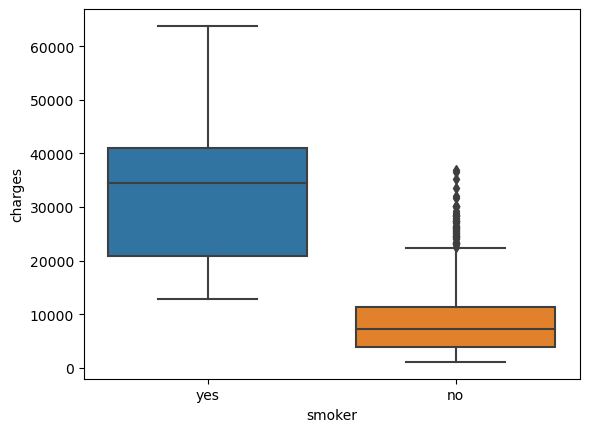

In [4]:
# Another graph of the data.
sns.boxplot(data=insuranceDF, x="smoker", y="charges")
plt.show();

In [5]:
# Stratification by smoker/non-smoker.
smokerGroup = insuranceDF[insuranceDF["smoker"]=="yes"]
nonsmokerGroup = insuranceDF[insuranceDF["smoker"]=="no"]

# T-test analysis.
ttest_ind(smokerGroup["charges"], nonsmokerGroup["charges"])

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179101e-283)

## ANOVA

The t-test is used to check for differences in population mean between three or more groups. 

In the following example, we will examine the differences in medical insurance charges based on whether an individual is a young adult, middle-aged, or an elderly.

In [6]:
# Create the age grouping column.
insuranceByAgeDF = insuranceDF[["age", "charges"]].copy()

def ageCategory(age):
    if age < 40:
        return "Young"
    elif age >= 60:
        return "Old"
    return "Middle"

insuranceByAgeDF["Age Grouping"] = insuranceDF["age"].apply(ageCategory)
insuranceByAgeDF

,age,charges,Age Grouping
0,19,16884.92400,Young
1,18,1725.55230,Young
2,28,4449.46200,Young
3,33,21984.47061,Young
4,32,3866.85520,Young
...,...,...,...
1333,50,10600.54830,Middle
1334,18,2205.98080,Young
1335,18,1629.83350,Young
1336,21,2007.94500,Young


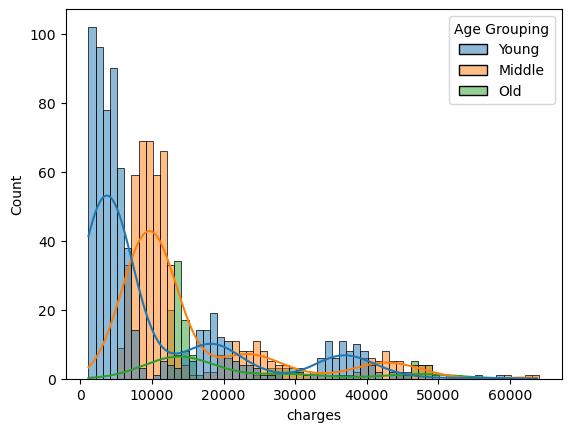

In [7]:
# Graph of the data.
sns.histplot(data=insuranceByAgeDF, x="charges", hue="Age Grouping", binwidth=1000, kde=True)
plt.show();

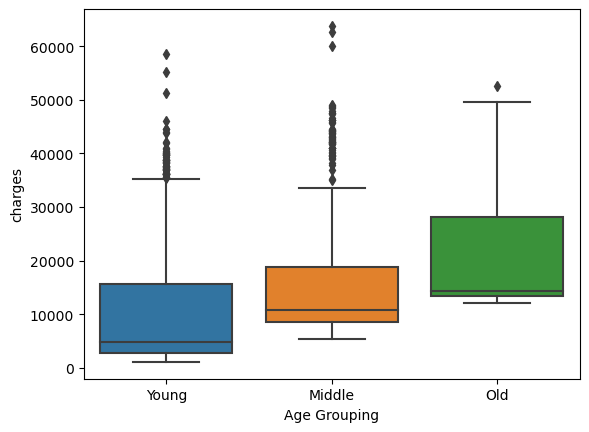

In [8]:
# Another graph of the data.
sns.boxplot(data=insuranceByAgeDF, x="Age Grouping", y="charges")
plt.show();

In [9]:
# Create separate dataframes for each grouping.
insuranceByAgeDF = insuranceDF[["age", "charges"]].copy()

insuranceYoungAgeDF = insuranceByAgeDF[insuranceByAgeDF["age"] < 40]
insuranceMiddleAgeDF = insuranceByAgeDF[(insuranceByAgeDF["age"] >= 40) & 
                                        (insuranceByAgeDF["age"] < 60)]
insuranceOldAgeDF = insuranceByAgeDF[insuranceByAgeDF["age"] >= 60]

# ANOVA Test.
f_oneway(insuranceYoungAgeDF["charges"], 
         insuranceMiddleAgeDF["charges"], 
         insuranceOldAgeDF["charges"])

F_onewayResult(statistic=60.75429155266902, pvalue=5.588370040336262e-26)

For more information, check the following:
- User Guide: https://docs.scipy.org/doc/scipy/tutorial/stats.html
- API Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

**Source:**


Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets